Total elements of PC:  33538704
Total elements of instructions:  33538704


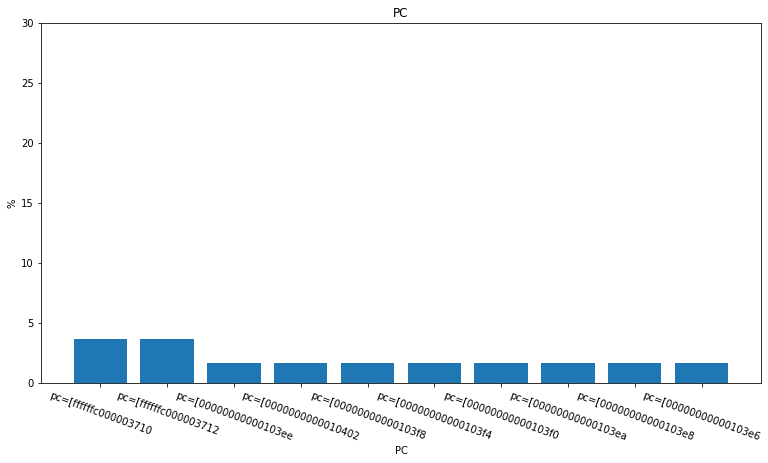

pc=[ffffffc000003710    1235566
pc=[ffffffc000003712    1235565
pc=[00000000000103ee     560448
pc=[0000000000010402     560448
pc=[00000000000103f8     560448
pc=[00000000000103f4     560448
pc=[00000000000103f0     560448
pc=[00000000000103ea     560448
pc=[00000000000103e8     560448
pc=[00000000000103e6     560448
Name: PC, dtype: int64
% of each address:
0 = pc=[ffffffc000003710 = 3.6840004312629375 %
1 = pc=[ffffffc000003712 = 3.6839974496331163 %
2 = pc=[00000000000103ee = 1.671048469851429 %
3 = pc=[0000000000010402 = 1.671048469851429 %
4 = pc=[00000000000103f8 = 1.671048469851429 %
5 = pc=[00000000000103f4 = 1.671048469851429 %
6 = pc=[00000000000103f0 = 1.671048469851429 %
7 = pc=[00000000000103ea = 1.671048469851429 %
8 = pc=[00000000000103e8 = 1.671048469851429 %
9 = pc=[00000000000103e6 = 1.671048469851429 %


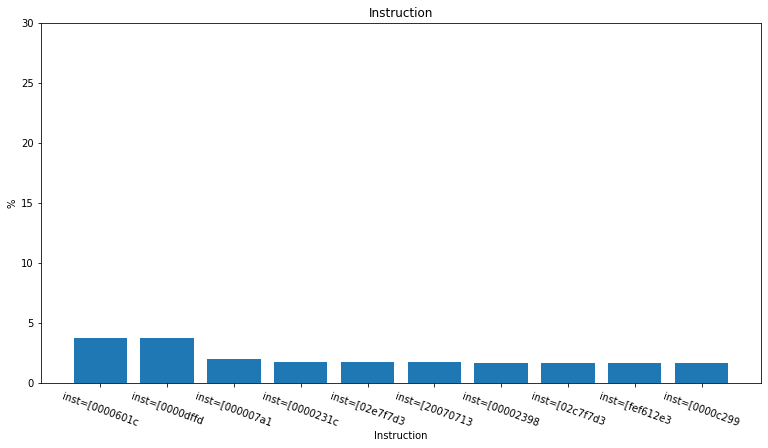

inst=[0000601c    1235804
inst=[0000dffd    1235565
inst=[000007a1     657852
inst=[0000231c     577457
inst=[02e7f7d3     569269
inst=[20070713     569205
inst=[00002398     560512
inst=[02c7f7d3     560448
inst=[fef612e3     560448
inst=[0000c299     560448
Name: instruction, dtype: int64
% of each address:
0 = inst=[0000601c = 3.684710059160307 %
1 = inst=[0000dffd = 3.6839974496331163 %
2 = inst=[000007a1 = 1.961471140924229 %
3 = inst=[0000231c = 1.7217630114747429 %
4 = inst=[02e7f7d3 = 1.6973494265013938 %
5 = inst=[20070713 = 1.6971586021928573 %
6 = inst=[00002398 = 1.6712392941599652 %
7 = inst=[02c7f7d3 = 1.671048469851429 %
8 = inst=[fef612e3 = 1.671048469851429 %
9 = inst=[0000c299 = 1.671048469851429 %


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as NP
import sys
Benchmark = input("Which benchmark?")
original_stdout = sys.stdout


with open(Benchmark+'_python_output.txt', 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print('This message will be written to a file.')
    sys.stdout = original_stdout # Reset the standard output to its original value

# data = pd.read_csv('nw_outputlog.txt', sep=" ", usecols=[12,13,14,15,16,17], skiprows=2)
data = pd.read_csv(Benchmark+'_outputlog.txt', skiprows=3)
lengde = len(data)
PC = []
Inst = []
for i in range(int(lengde)):
    testline = data.iloc[i,0]
    if type(testline) is str:
        x = testline.split("] ")
        # print(x)
        for k in x:
            if "inst=[" in k:
                Inst.append(k)
            if "pc=[" in k:
                PC.append(k)

print("Total elements of PC: ",len(PC))
print("Total elements of instructions: ",len(Inst))

df = pd.DataFrame(list(zip(PC,Inst)), columns=['PC', 'instruction'])
values = pd.DataFrame(df['PC'].value_counts()[:10])
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
X = values.index
y = [(el[0]/len(PC))*100 for el in values.values]
ax.bar(X,y)
plt.title("PC")
plt.xlabel("PC")
plt.ylabel("%")
plt.ylim([0,30])
plt.xticks(rotation=-20)
plt.savefig(Benchmark+'_pc_plot.png', bbox_inches='tight')
plt.show()

print(df['PC'].value_counts()[:10])
print("% of each address:")
for i in range(10):
    print(i, "=", X[i], "=", y[i],"%")


values = pd.DataFrame(df['instruction'].value_counts()[:10])
fig = plt.figure(figsize=(10, 5))
ax = fig.add_axes([0,0,1,1])
X = values.index
y = [(el[0]/len(Inst))*100 for el in values.values]
ax.bar(X,y)
plt.title("Instruction")
plt.xlabel("Instruction")
plt.ylabel("%")
plt.ylim([0,30])
plt.xticks(rotation=-20)
plt.savefig(Benchmark+'_instruction_plot.png', bbox_inches='tight')
plt.show()

print(df['instruction'].value_counts()[:10])
print("% of each address:")
for i in range(10):
    print(i, "=", X[i], "=", y[i], "%")
        